### Dependencies

In [2]:
import matplotlib as mpl
import matplotlib.lines as mlines
from matplotlib.ticker import FormatStrFormatter




new_rc_paramas = {
    'text.usetex' : True,
    'figure.dpi' : 180,
    'text.latex.preamble' : r'\usepackage{libertine}'r'\usepackage{libertinust1math}',
    'font.family' : 'Linux Libertine',
    'axes.titlesize' : 22,
    'axes.labelsize' : 18,
    'xtick.labelsize' : 16,
    'ytick.labelsize' : 16,
    'xtick.direction' : 'in',
    'ytick.direction' : 'in',
    'xtick.top' : True,
    'ytick.right' : True,
    'legend.fontsize' : 'large',
    'axes.linewidth' : 1.2,
    'savefig.bbox' : 'tight',
    'image.aspect' : 'equal',
}

Oh2 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(h^2)$')
Oh3 = mlines.Line2D([], [], color='black', linestyle="-.", label=r'$\mathcal{O}(h^3)$')
Oh1 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(h)$')
Ohneg2 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(h^{-2})$')
Ohneg1 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(h^{-1})$')
Odt = mlines.Line2D([], [], color='black', linestyle="--", label=r'$\mathcal{O}(\Delta t)$')
Odt2 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(\Delta t^2)$')
tau1 = mlines.Line2D([], [], color='C4', linestyle="--", label=r'$\tau_0 = \tau_1 = 1$')
tau10neg4 = mlines.Line2D([], [], color='C0', linestyle="-", label=r'$\tau_0 = \tau_1 = 1\cdot 10^{-4}$')
tau10neg3 = mlines.Line2D([], [], color='C0', linestyle="-", label=r'$\tau_0 = \tau_1 = 1\cdot 10^{-3}$')
tau3x10neg3 = mlines.Line2D([], [], color='C0', linestyle="-", label=r'$\tau_0 = \tau_1 = 3\cdot 10^{-3}$')
tau5x10neg3 = mlines.Line2D([], [], color='C0', linestyle="-", label=r'$\tau_0 = \tau_1 = 5\cdot 10^{-3}$')
tau3x10neg4 = mlines.Line2D([], [], color='C2', linestyle="-.", label=r'$\tau_0 = \tau_1 = 3\cdot 10^{-4}$')
tau5x10neg4 = mlines.Line2D([], [], color='C3', linestyle=":", label=r'$\tau_0 = \tau_1 = 5\cdot 10^{-4}$')

conservative = mlines.Line2D([0], [0], marker='None', color='black', linestyle=":", label='Conservative')
classical = mlines.Line2D([0], [0], marker='None', color='black', linestyle=(0, (5,7)), label='Non-conservative')


space = mlines.Line2D([0], [0], marker='None', color='None', linestyle="None", label=' ')

circle = mlines.Line2D([0], [0], marker='o', color='black', 
                          markersize=9, markerfacecolor="None", 
                          linestyle="None", markeredgewidth=0.8,
                           label='Full stabilization.')
                          
star = mlines.Line2D([], [], color='black', marker='*',
                          markersize=9,linestyle="None",
                        markeredgewidth=0.8, markerfacecolor="None", 
                        label='Macro stabilization.')

triangle = mlines.Line2D([0], [0], marker='^', color='black', 
                          markersize=9, markerfacecolor="None", 
                          linestyle="None", markeredgewidth=0.8,
                           label='Macro stab. 2')


import matplotlib.pyplot as plt

mpl.rcParams.update(new_rc_paramas)

import numpy as np


### Description

In example 1, the following plots are generated:

1. Error and condition number vs stabilization constant $\tau$.
2. Error, condition number and nnz vs macro-element parameter $\delta$.
3. Error and condition number vs $h$ when $\Delta t_n \propto h$.
4. Error for conservative (left) and non-conservative (right) schemes vs $\Delta t_n$ for $h=0.005$.
5. Conservation error and nnz vs time $t$ for both schemes, both stabilizations and polynomial orders.
6. Conservation error for conservative (left) and non-conservative (right) schemes in last time point vs $h$.


### 1. Error and condition number vs stabilization constant $\tau$.

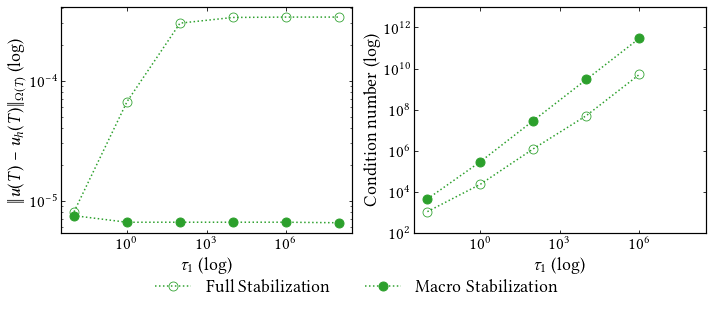

In [3]:
# h = 0.01, lobatto n = 3, T = 0.1, dT = h/3, Method 2 for macro
error_conservative_fullstab = [5.736617964275335e-06, 4.157624809190999e-05, 0.0002381289739341548, 0.0003207399325503981, 0.0003238964030539121, 0.0003239553994138047]
cond_conservative_fullstab = [1.366031e+03, 2.5465e+04, 1.5387e+06, 5.5977e+07, 5.520071e+09]   # last inf
nnz_fullstab = 129876

# delta = 0.5
error_conservative_macro = [5.121453616690796e-06, 4.278439448947408e-06, 4.280496679285899e-06, 4.280515805569344e-06, 4.280995640902946e-06, 4.368088389590622e-06]
cond_conservative_macro = [4.514703e+03, 2.928595e+05, 2.9145e+07, 2.9144e+09, 2.9144e+11]      # last inf
nnz_macro = 117252

# h = 0.0125, lobatto n = 3, T = 0.1, dT = h/3, AlgoimMacro
error_conservative_fullstab = [8.101156529901348e-06, 6.689537678998772e-05, 0.0003015208614124882, 0.0003363357045758615, 0.000338688873970378, 0.0003386734032010332]
cond_conservative_fullstab = [1.0987e+03, 2.3554e+04, 1.2520e+06, 5.1290e+07, 5.1290e+09]
nnz_fullstab = 86688

# delta = 0.5
error_conservative_macro = [7.517491303628505e-06, 6.624728622958252e-06, 6.629225036883698e-06, 6.629278100257246e-06, 6.629749112212584e-06, 6.561957714741836e-06]
cond_conservative_macro = [4.5313e+03, 2.9462e+05, 2.9331e+07, 2.9329e+09, 2.9329e+11]          # last inf
nnz_macro = 76752


tau = [1e-2, 1e0, 1e2, 1e4, 1e6, 1e8]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.loglog(tau, error_conservative_fullstab, marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2")
ax1.loglog(tau, error_conservative_macro,  marker='o', markersize=9, linestyle=":", color="C2")
ax1.set_xlabel(r"$\tau_1$ (log)", fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=17)
ax1.set_ylabel(r"$\|u(T)-u_h(T)\|_{\Omega(T)}$ (log)", fontsize=18)

ax2.loglog(tau[:-1], cond_conservative_fullstab, marker='o', markersize=9, linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2")
ax2.loglog(tau[:-1], cond_conservative_macro,  marker='o', markersize=9, linestyle=":", color="C2")
ax2.loglog(tau, tau,  marker='None', linestyle="None")
ax2.loglog([],[], linestyle=":",  marker='o', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"Full Stabilization")
ax2.loglog([],[], linestyle=":",  marker='o', markersize=9, color="C2", label=r"Macro Stabilization")
ax2.set_xlabel(r"$\tau_1$ (log)", fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=17)
ax2.set_ylabel(r"Condition number (log)", fontsize=18)
ax2.set_ylim(1e2, 1e13)
handles, labels = [(a + b) for a, b in zip(ax1.get_legend_handles_labels(), ax2.get_legend_handles_labels())]
fig.legend(handles, labels, loc='lower center', ncols=4, bbox_to_anchor=(0.5, -0.1), fontsize=18, frameon=False)
plt.tight_layout()
plt.show()


### 2. Error, condition number and nnz vs macro-element parameter $\delta$.

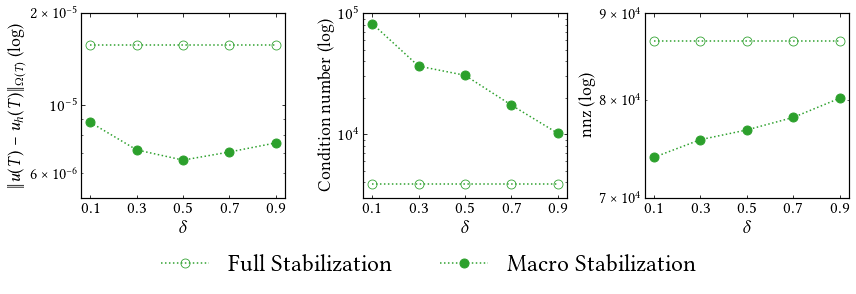

In [4]:
# h = 0.0125
# tau_1 = 0.1
# T = 0.1

error_conservative_macro = [7.158255743741944e-06, 6.633078733781234e-06, 7.203681855252234e-06, 7.725115799461858e-06]
cond_conservative_macro = [3.652207e+04, 3.068008e+04, 1.742298e+04, 1.164437e+04]
nnz_macro = [75816, 76752, 78072, 79440]

# algoimmacro
delta = [0.1, 0.3, 0.5, 0.7, 0.9]
error_conservative_macro = [8.798963664899849e-06, 7.154162986786534e-06, 6.624656265925931e-06, 7.041154064546134e-06, 7.539355618760637e-06]
cond_conservative_macro = [8.208884e+04, 3.652207e+04, 3.068008e+04, 1.742296e+04, 1.0187e+04]
nnz_macro = [73944, 75744, 76752, 78072, 80136]

error_conservative_fullstab = 1.573397156540476e-05*np.ones(np.size(error_conservative_macro))
cond_conservative_fullstab = 3.867161e+03*np.ones(np.size(error_conservative_macro))
nnz_fullstab = 86688*np.ones(np.size(error_conservative_macro))

# vs delta

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3.5))
ax1.semilogy(delta, error_conservative_fullstab, marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2")
ax1.semilogy(delta, error_conservative_macro,  marker='o', markersize=9, linestyle=":", color="C2")
ax1.set_xlabel(r"$\delta$", fontsize=18)
lbs = ['0.1', '0.3', '0.5', '0.7', '0.9']
ax1.set_xticks(delta)
ax1.set_xticklabels(lbs)
ax1.tick_params(axis='both', which='major', labelsize=17)
ax1.set_ylabel(r"$\|u(T)-u_h(T)\|_{\Omega(T)}$ (log)", fontsize=18)
ax1.set_ylim(5e-6, 2e-5)

ax2.semilogy(delta, cond_conservative_fullstab, marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2")
ax2.semilogy(delta, cond_conservative_macro,  marker='o', markersize=9, linestyle=":", color="C2")
#ax2.semilogy(delta, delta,  marker='None', linestyle="None")
ax2.semilogy([],[], marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"Full Stabilization")
ax2.semilogy([],[], linestyle=":",  marker='o', markersize=9, color="C2", label=r"Macro Stabilization")
ax2.set_xlabel(r"$\delta$", fontsize=18)
ax2.set_ylim(3e3, 1e5)
ax2.set_xticks(delta)
ax2.set_xticklabels(lbs)
ax2.tick_params(axis='both', which='major', labelsize=17)
ax2.set_ylabel(r"Condition number (log)", fontsize=18)
#ax2.set_ylim(1e2, 1e13)

ax3.semilogy(delta, nnz_fullstab, marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2")
ax3.semilogy(delta, nnz_macro,  marker='o', markersize=9, linestyle=":", color="C2")
ax3.set_xlabel(r"$\delta$", fontsize=18)
ax3.set_ylim(7e4, 9e4)
ax3.set_xticks(delta)
ax3.set_xticklabels(lbs)
ax3.tick_params(axis='both', which='major', labelsize=17)
ax3.set_ylabel(r"nnz (log)", fontsize=18)
#ax3.set_ylim(7e4, 9e4)

handles, labels = [(a + b + c) for a, b, c in zip(ax1.get_legend_handles_labels(), ax2.get_legend_handles_labels(), ax3.get_legend_handles_labels())]
fig.legend(handles, labels, loc='lower center', ncols=4, bbox_to_anchor=(0.5, -0.2), fontsize=24, frameon=False)
plt.tight_layout()
plt.show()

### 3. Error and condition number vs $h$ when $\Delta t_n \propto h$.

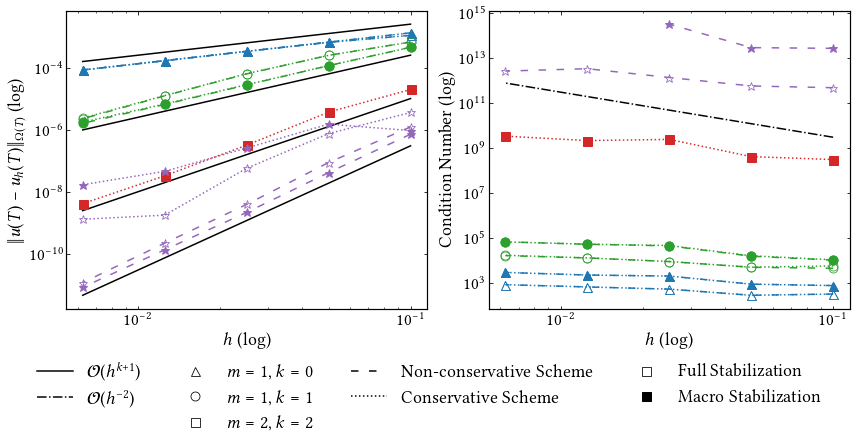

In [9]:
# Condition numbers are computed with condest

# P0P1
error_conservative_P0P1_fullstab = [0.001088076182636752, 0.0006491740578439569, 0.0003333812765067587, 0.0001666554028157588, 8.334326437297446e-05]
cond_conservative_P0P1_fullstab = [3.293664e+02,2.900614e+02,5.433976e+02,6.808435e+02,8.558770e+02]

error_conservative_P0P1_macro = [0.001313901235987455, 0.0006574471900280799, 0.0003317308567752578, 0.0001659892293630661, 8.32059567177379e-05]
cond_conservative_P0P1_macro = [7.827596e+02,9.040583e+02,2.067112e+03,2.295860e+03,2.992382e+03]

error_classical_P0P1_fullstab = [0.001089690761110918, 0.0006482400399029844, 0.0003334932551910931, 0.0001666672849441996, 8.334815967403742e-05]
cond_classical_P0P1_fullstab = [3.293521e+02,2.900576e+02,5.433547e+02,6.808442e+02,8.558772e+02]

error_classical_P0P1_macro = [0.001314024004368534, 0.0006574128712049226, 0.0003317615465742849, 0.0001659917761925381, 8.320731471188712e-05]
cond_classical_P0P1_macro = [7.824315e+02,9.040288e+02,2.066754e+03,2.295858e+03,2.992390e+03]

nnz_P0P1_fullstab = [1074,2460,7287,21672,75129]
nnz_P0P1_macro = [834,1878,5961,19188,69993]

# P1P1
# delta = 0.5, T = 0.1, dT=h/3, lobatto n = 3, P3 interpolation both space & time
error_conservative_P1P1_macro = [0.0004497536195905485, 0.0001148872513125353, 2.801857859882853e-05, 6.64869423513326e-06, 1.739942525707841e-06]
cond_conservative_P1P1_macro = [1.090070e+04,1.639250e+04,4.691267e+04,5.368264e+04,6.817228e+04]
nnz_P1P1_macro = [3336,7512,23844,76752,279972]

# error_conservative_P1P1_fullstab_patch =
# cond_conservative_P1P1_fullstab_patch = 

error_conservative_P1P1_fullstab = [0.0006663906942903397, 0.0002462839007548384, 6.321940038638657e-05, 1.246094052968081e-05, 2.337096191457098e-06]
cond_conservative_P1P1_fullstab = [5.798977e+03,5.099834e+03,9.154832e+03,1.327019e+04,1.729418e+04]
nnz_P1P1_fullstab = [4296,9840,29148,86688,300516]

error_classical_P1P1_fullstab = [0.0006624698818069199, 0.0002470175780063419, 6.249118040554817e-05, 1.22721498068521e-05, 2.232837016879022e-06]
cond_classical_P1P1_fullstab = [4.585025e+03,5.079001e+03,9.104521e+03,1.320964e+04,1.672331e+04]


error_classical_P1P1_macro = [0.0004495561169776955, 0.0001150159513064808, 2.740249888772975e-05, 6.465636169505382e-06, 1.588641455991942e-06] 
cond_classical_P1P1_macro = [1.055563e+04,1.577429e+04,4.529231e+04,5.335741e+04,6.834885e+04]


# # P2P2

# # n = 5
# error_conservative_P2P2_fullstab =
# cond_conservative_P2P2_fullstab = 

# delta = 0.5, T = 0.1, dT = h/3, lobatto n = 5
error_conservative_P2P2_macro = [1.969496434419448e-05, 3.70438458355385e-06, 4.152409274877422e-07, 3.926742467893485e-08, 1.241820426040728e-08]
cond_conservative_P2P2_macro = [3.075440e+08,4.145235e+08,2.403757e+09,2.133025e+09,3.357496e+09]

# delta = 0.5, T = 0.1, dT = h/3, lobatto n = 7
error_conservative_P2P2_macro = [1.961490368664613e-05, 3.646892889205503e-06, 3.148119937681194e-07, 3.237983342519889e-08, 4.095739515566473e-09]
cond_conservative_P2P2_macro = [3.070250e+08,4.140698e+08,2.408753e+09,2.134556e+09,3.360019e+09]


# error_classical_P2P2_fullstab =
# cond_classical_P2P2_fullstab = 

# error_classical_P2P2_macro = 
# cond_classical_P2P2_macro = 

# nnz_P2P2_fullstab = 
nnz_P2P2_macro = [55107,121635,390555,1239003,4505139]


# P3P3, delta = 0.5, T = 0.1, dT = h/3, 

# space = time = 7
error_conservative_P3P3_macro = [9.283242891385952e-07, 1.502978940217463e-06, 2.547029703506079e-07, 4.515463428682432e-08, 1.67137127868449e-08]

# lobatto n = 9, space n = 7
error_conservative_P3P3_fullstab = [1.230679911104749e-06, 4.450793335800824e-07, 1.462248570537432e-08, 4.015429698389802e-09]
cond_conservative_P3P3_fullstab = [4.747761e+11,5.664064e+11,1.346252e+12,3.307710e+12]

# lobatto n = 10, space n = 7, tau1 = 10
error_conservative_P3P3_fullstab = [3.561631292515755e-06, 7.410678070417087e-07, 5.649097887209412e-08, 1.747417867052343e-09, 1.289402068949506e-09]


# error_conservative_P3P3_macro = [8.707012050400018e-07, 5.62319374097584e-07, 8.566174213909749e-08, 6.431833409151911e-09]
# cond_conservative_P3P3_macro = [2.655611e+13,2.856219e+13,3.149955e+14,2.653597e+14]

# with dT = h^2/3
#error_conservative_P3P3_macro = [8.82018e-07, ]

# time = 7, space = 5               # time quadrature order = space quadrature order = 7

error_classical_P3P3_fullstab = [1.219470080569245e-06, 8.676514660169436e-08, 3.880704664179111e-09, 2.194548344468484e-10, 1.170157076756793e-11] #[1.219470080569245e-06, 8.676514660169436e-08, 3.880704664179111e-09]
cond_classical_P3P3_fullstab = [4.747748e+11,5.664648e+11,1.346285e+12,3.307691e+12,2.596705e+12]       # non-condest: [9.324134e+10,1.166743e+11,2.233956e+11]
nnz_P3P3_fullstab = [507936,1153344,3333360,9391872,31583568]

# time = 7, space = 7
error_classical_P3P3_macro = [7.082900717297273e-07, 4.112852673193111e-08, 2.143297479270472e-09, 1.334009430400426e-10, 8.266185849248742e-12]
#cond_classical_P3P3_macro = [5.860654e+12,Inf,Inf]
cond_classical_P3P3_macro = [2.653075e+13,2.853177e+13,314301084359682] # condest
nnz_P3P3_macro = [359328,779232,2499600]

# # time 9, space 7
# error_classical_P3P3_macro = [7.083489357278553e-07, 4.112799338666113e-08, 2.143386086319943e-09]
# cond_classical_P3P3_macro = [2.656267e+13,2.856320e+13,3.149542e+14]

h = [0.1, 0.05, 0.025, 0.0125, 0.00625]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.loglog(h, 0.25e-1*np.power(h, 1), linestyle="-", color="black")  
ax1.loglog(h, 0.25e-1*np.power(h, 2), linestyle="-", color="black")  
ax1.loglog(h, 1.e-2*np.power(h, 3), linestyle="-", color="black") 
ax1.loglog(h, 3.e-3*np.power(h, 4), linestyle="-", color="black")  
ax1.loglog(h, error_conservative_P0P1_fullstab, marker='^', markersize=9, linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0")
ax1.loglog(h, error_conservative_P0P1_macro, marker='^', markersize=9, linestyle=":", color="C0")
ax1.loglog(h, error_conservative_P1P1_fullstab, marker='o', markersize=9, linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2")
ax1.loglog(h, error_conservative_P1P1_macro, marker='o', markersize=9, linestyle=":", color="C2")
# ax1.loglog(h, error_conservative_P2P2_fullstab, marker='s', markersize=9, linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3")
ax1.loglog(h, error_conservative_P2P2_macro, marker='s', markersize=9, linestyle=":", color="C3")
ax1.loglog(h, error_conservative_P3P3_fullstab, marker='*', markersize=9, linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4")
ax1.loglog(h, error_conservative_P3P3_macro, marker='*', markersize=9, linestyle=":", color="C4")

ax1.loglog(h, error_classical_P0P1_fullstab, marker='^', markersize=9, linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C0")
ax1.loglog(h, error_classical_P0P1_macro, marker='^', markersize=9, linestyle=(0, (5,7)), color="C0")
ax1.loglog(h, error_classical_P1P1_fullstab, marker='o', markersize=9, linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C2")
ax1.loglog(h, error_classical_P1P1_macro, marker='o', markersize=9, linestyle=(0, (5,7)), color="C2")
# ax1.loglog(h, error_classical_P2P2_fullstab, marker='s', markersize=9, linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C3")
# ax1.loglog(h, error_classical_P2P2_macro, marker='s', markersize=9, linestyle=(0, (5,7)), color="C3")
ax1.loglog(h, error_classical_P3P3_fullstab, marker='*', markersize=9, linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C4")
ax1.loglog(h, error_classical_P3P3_macro, marker='*', markersize=9, linestyle=(0, (5,7)), color="C4")


ax1.set_xlabel(r"$h$ (log)", fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=17)
ax1.set_ylabel(r"$\|u(T)-u_h(T)\|_{\Omega(T)}$ (log)", fontsize=18)

ax2.loglog([],[], label=r"$\mathcal{O}(h^{k+1})$", linestyle="-", color="black")
ax2.loglog(h, 3e7*np.power(h, -2), label=r"$\mathcal{O}(h^{-2})$", linestyle="-.", color="black")
ax2.loglog([],[], linestyle="None", label=" ")
ax2.loglog([],[], linestyle="None",  marker='^', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"$m=1, k=0$")
ax2.loglog([],[], linestyle="None",  marker='o', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"$m=1, k=1$")
ax2.loglog([],[], linestyle="None",  marker='s', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"$m=2, k=2$")
#ax2.loglog([],[], linestyle="None", label=" ")
ax2.loglog([],[], linestyle=(0, (5,7)), color="black",label=r"Non-conservative Scheme")
ax2.loglog([],[], linestyle=":", color="black", label=r"Conservative Scheme")
#ax2.loglog([],[], linestyle="None", label=" ")
ax2.loglog([],[], linestyle="None",  marker='s', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"Full Stabilization")
ax2.loglog([],[], linestyle="None",  marker='s', markersize=9, color="black", label=r"Macro Stabilization")

ax2.loglog(h, cond_conservative_P0P1_fullstab, marker='^', markersize=9, linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0")
ax2.loglog(h, cond_conservative_P0P1_macro, marker='^', markersize=9, linestyle=":", color="C0")
ax2.loglog(h, cond_conservative_P1P1_fullstab, marker='o', markersize=9, linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2")
ax2.loglog(h, cond_conservative_P1P1_macro, marker='o', markersize=9, linestyle=":", color="C2")
# ax2.loglog(h, cond_conservative_P2P2_fullstab, marker='s', markersize=9, linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3")
ax2.loglog(h, cond_conservative_P2P2_macro, marker='s', markersize=9, linestyle=":", color="C3")
#ax2.loglog(h[:-1], cond_conservative_P3P3_fullstab, marker='*', markersize=9, linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4")
#ax2.loglog(h[:-1], cond_conservative_P3P3_macro, marker='*', markersize=9, linestyle=":", color="C4")

ax2.loglog(h, cond_classical_P0P1_fullstab, marker='^', markersize=9, linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C0")
ax2.loglog(h, cond_classical_P0P1_macro, marker='^', markersize=9, linestyle=(0, (5,7)), color="C0")
ax2.loglog(h, cond_classical_P1P1_fullstab, marker='o', markersize=9, linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C2")
ax2.loglog(h, cond_classical_P1P1_macro, marker='o', markersize=9, linestyle=(0, (5,7)), color="C2")
# ax2.loglog(h, cond_classical_P2P2_fullstab, marker='s', markersize=9, linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C3")
# ax2.loglog(h, cond_classical_P2P2_macro, marker='s', markersize=9, linestyle=(0, (5,7)), color="C3")

ax2.loglog(h, cond_classical_P3P3_fullstab, marker='*', markersize=9, linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C4")
ax2.loglog(h[:-2], cond_classical_P3P3_macro, marker='*', markersize=9, linestyle=(0, (5,7)), color="C4")

ax2.set_xlabel(r"$h$ (log)", fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=17)
ax2.set_ylabel(r"Condition Number (log)", fontsize=18)

handles, labels = [(a + b) for a, b in zip(ax1.get_legend_handles_labels(), ax2.get_legend_handles_labels())]
fig.legend(handles, labels, loc='lower center', ncols=4, bbox_to_anchor=(0.5, -0.25), fontsize=18, frameon=False)
plt.tight_layout()
plt.show()

### 4. Error for conservative (left) and non-conservative (right) schemes vs $\Delta t_n$ for $h=0.005$.

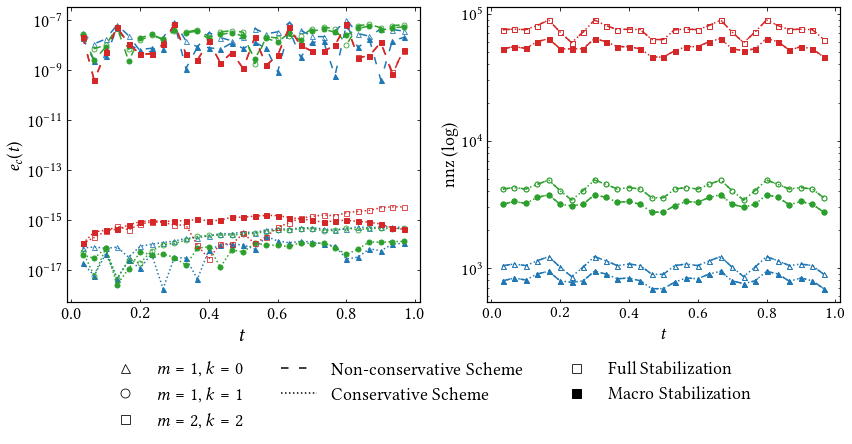

In [6]:

### Conservation error

ec_classical_fullstab_P0P1 = [0, 2.97922e-08, 1.10891e-08, 1.71507e-08, 6.35988e-08, 2.33267e-08, 5.71193e-09, 5.21837e-09, 1.94858e-08, 8.22301e-08, 1.44504e-08, 8.31785e-09, 3.08215e-08, 1.96376e-08, 1.45827e-08, 1.98057e-08, 4.50671e-08, 2.74738e-08, 3.32924e-08, 7.68747e-08, 3.8451e-08, 2.19344e-08, 2.12952e-08, 3.57427e-08, 9.87637e-08, 2.8538e-08, 2.22261e-08, 4.34785e-08, 4.08866e-08, 3.58496e-08]
nnz_classical_fullstab_P0P1 = [891,1044,1074,1044,1137,1230,1014,855,1014,1230,1137,1044,1074,1044,891,891,1044,1074,1044,1137,1230,1014,855,1014,1230,1137,1044,1074,1044,891]

ec_classical_macro_P0P1 = [0, 1.95342e-08, 2.20593e-09, 3.45783e-09, 4.78367e-08, 9.94656e-09, 6.49306e-09, 7.34466e-09, 7.0181e-09, 7.39801e-08, 1.13291e-09, 8.15204e-09, 7.80626e-09, 6.57717e-09, 1.20466e-08, 7.21632e-09, 1.28913e-08, 7.2638e-09, 8.33424e-10, 4.06744e-08, 3.25835e-09, 1.24857e-08, 1.37611e-08, 5.89183e-10, 6.49559e-08, 7.88923e-09, 1.70021e-08, 3.90645e-10, 1.46509e-08, 1.98533e-08]
nnz_classical_macro_P0P1 = [687,792,834,804,897,942,792,771,792,942,897,822,834,792,687,687,774,834,822,897,942,792,753,792,942,897,786,834,792,687]

ec_conservative_fullstab_P0P1 = [0, 7.38647e-17, 8.21317e-17, 7.19944e-17, 8.07358e-17, 3.17908e-17, 8.78661e-17, 1.05084e-16, 1.23151e-16, 1.4184e-16, 1.81813e-16, 1.91584e-16, 2.29064e-16, 2.78666e-16, 2.77401e-16, 3.29188e-16, 3.02557e-16, 3.97459e-16, 4.40949e-16, 4.11987e-16, 4.84094e-16, 4.78906e-16, 4.32302e-16, 4.02849e-16, 4.22555e-16, 5.31659e-16, 4.71412e-16, 5.22437e-16, 5.2262e-16, 4.90492e-16]
nnz_conservative_fullstab_P0P1 = [891,1044,1074,1044,1137,1230,1014,855,1014,1230,1137,1044,1074,1044,891,891,1044,1074,1044,1137,1230,1014,855,1014,1230,1137,1044,1074,1044,891]

ec_conservative_macro_P0P1 = [0, 1.83535e-17, 5.80387e-18, 4.42388e-17, 4.40796e-18, 2.37203e-17, 1.15383e-17, 4.26335e-17, 1.74934e-18, 3.16327e-17, 2.91572e-17, 4.2341e-18, 6.25303e-17, 9.82548e-17, 1.03928e-16, 1.00205e-16, 6.6635e-17, 2.17048e-16, 1.42577e-16, 1.20554e-16, 1.37149e-16, 1.31962e-16, 1.06174e-16, 9.05991e-17, 2.70377e-17, 3.20589e-17, 6.89557e-17, 5.75309e-17, 1.06286e-16, 1.15792e-16]
nnz_conservative_macro_P0P1 = [687,792,834,804,897,942,792,771,792,942,897,822,834,792,687,687,774,834,822,897,942,792,753,792,942,897,786,834,792,687]



ec_conservative_macro = [0, 3.91702e-17, 2.88906e-17, 7.37224e-17, 2.53093e-18, 1.09742e-17, 5.09118e-17, 4.06332e-17, 4.33827e-17, 3.08174e-17, 1.52794e-17, 7.3623e-17, 8.3347e-17, 1.27675e-17, 6.22948e-17, 5.16324e-17, 1.15207e-16, 9.90865e-17, 9.40043e-17, 8.58593e-17, 1.23271e-16, 1.11145e-16, 1.20052e-16, 7.67213e-17, 4.09155e-17, 6.67534e-17, 1.31406e-16, 1.2692e-16, 1.34042e-16, 1.36608e-16]
nnz_conservative_macro = [2748,3168,3336,3216,3588,3768,3168,3084,3168,3768,3588,3288,3336,3168,2748,2748,3096,3336,3288,3588,3768,3168,3012,3168,3768,3588,3144,3336,3168,2748]

ec_conservative_fullstab = [0, 5.3048e-17, 5.80387e-18, 7.19944e-17, 4.40796e-18, 2.48519e-17, 1.84772e-17, 5.65113e-17, 1.02334e-16, 1.14084e-16, 1.54057e-16, 2.1934e-16, 2.36003e-16, 2.43972e-16, 2.49645e-16, 2.66738e-16, 2.8868e-16, 3.35009e-16, 3.92377e-16, 3.91171e-16, 4.4246e-16, 4.37273e-16, 3.69852e-16, 3.75094e-16, 4.71127e-16, 3.9982e-16, 4.50595e-16, 4.53048e-16, 4.46292e-16, 4.48858e-16]
nnz_conservative_fullstab = [3564,4176,4296,4176,4548,4920,4056,3420,4056,4920,4548,4176,4296,4176,3564,3564,4176,4296,4176,4548,4920,4056,3420,4056,4920,4548,4176,4296,4176,3564]

ec_classical_fullstab = [0, 2.76094e-08, 7.05734e-09, 9.73189e-09, 5.05698e-08, 6.64383e-09, 1.55699e-08, 2.37701e-08, 1.69936e-08, 3.70087e-08, 3.22435e-08, 4.03313e-08, 2.12898e-08, 3.28235e-08, 3.73892e-08, 3.2042e-08, 1.77426e-09, 2.14097e-08, 1.8775e-08, 2.22515e-08, 2.18336e-08, 4.39835e-08, 5.19421e-08, 4.36733e-08, 9.92317e-09, 5.90004e-08, 6.6095e-08, 4.85916e-08, 5.94011e-08, 6.3902e-08]
nnz_classical_fullstab = [3564,4176,4296,4176,4548,4920,4056,3420,4056,4920,4548,4176,4296,4176,3564,3564,4176,4296,4176,4548,4920,4056,3420,4056,4920,4548,4176,4296,4176,3564]

ec_classical_macro = [0, 2.41135e-08, 2.44801e-09, 8.21686e-09, 4.83531e-08, 2.32224e-09, 1.90026e-08, 2.62201e-08, 1.68348e-08, 3.9629e-08, 3.10858e-08, 3.49061e-08, 1.72755e-08, 2.60912e-08, 3.09244e-08, 2.22844e-08, 2.71e-09, 1.81966e-08, 1.32502e-08, 2.91466e-08, 1.51399e-08, 3.57489e-08, 4.21305e-08, 3.22468e-08, 2.41432e-08, 4.53592e-08, 5.6971e-08, 3.82843e-08, 4.80028e-08, 5.29452e-08]
nnz_classical_macro = [2748,3168,3336,3216,3588,3768,3168,3084,3168,3768,3588,3288,3336,3168,2748,2748,3096,3336,3288,3588,3768,3168,3012,3168,3768,3588,3144,3336,3168,2748]


ec_classical_fullstab_P2P2 = [0, 2.11739e-08, 3.83792e-10, 5.01429e-09, 5.09952e-08, 1.06585e-08, 4.41733e-09, 4.41192e-09, 1.07826e-08, 6.94217e-08, 4.28243e-09, 2.47266e-09, 1.38479e-08, 1.93189e-09, 4.81464e-09, 1.1383e-09, 2.00335e-08, 1.53362e-09, 3.86148e-09, 4.98015e-08, 9.51113e-09, 5.55825e-09, 5.5531e-09, 9.64519e-09, 6.82908e-08, 3.15087e-09, 3.60405e-09, 1.27127e-08, 7.88837e-10, 5.95405e-09]
nnz_classical_fullstab_P2P2 =[62667,74979,75627,74979,80811,89235,71739,59211,71739,89235,80811,74979,75627,74979,62667,62667,74979,75627,74979,80811,89235,71739,59211,71739,89235,80811,74979,75627,74979,62667]

ec_classical_macro_P2P2 = [0, 2.11154e-08, 3.76066e-10, 5.03319e-09, 5.11469e-08, 1.07542e-08, 4.30425e-09, 4.29855e-09, 1.09024e-08, 6.95838e-08, 4.35051e-09, 2.44738e-09, 1.39004e-08, 1.90956e-09, 4.81746e-09, 1.14139e-09, 1.99599e-08, 1.53058e-09, 3.84502e-09, 4.98631e-08, 9.49651e-09, 5.56365e-09, 5.55783e-09, 9.64688e-09, 6.82523e-08, 3.08224e-09, 3.69527e-09, 1.26578e-08, 6.67189e-10, 6.06058e-09]
nnz_classical_macro_P2P2 = [45603,52947,55107,53379,60291,63747,52947,52947,52947,63747,60291,55107,55107,52947,45603,45603,51219,55107,55107,60291,63747,52947,51219,52947,63747,60291,51651,55107,52947,45603]

ec_conservative_fullstab_P2P2 = [0, 1.12811e-16, 1.96173e-16, 3.49432e-16, 5.52401e-16, 3.98143e-16, 6.7649e-16, 8.12967e-16, 8.03032e-16, 6.06998e-16, 6.23796e-16, 9.55255e-17, 2.74366e-17, 1.11313e-16, 1.05595e-16, 2.84028e-16, 1.13557e-16, 2.07645e-16, 4.92661e-16, 7.70169e-16, 1.17455e-15, 1.35776e-15, 1.56397e-15, 1.44359e-15, 1.92161e-15, 2.17973e-15, 2.38087e-15, 3.03812e-15, 3.27857e-15, 3.29812e-15]
nnz_conservative_fullstab_P2P2 = [62667,74979,75627,74979,80811,89235,71739,59211,71739,89235,80811,74979,75627,74979,62667,62667,74979,75627,74979,80811,89235,71739,59211,71739,89235,80811,74979,75627,74979,62667]

ec_conservative_macro_P2P2 = [0, 1.12811e-16, 3.21073e-16, 3.91065e-16, 4.13623e-16, 6.27126e-16, 8.36084e-16, 9.2399e-16, 8.51604e-16, 8.98431e-16, 9.29108e-16, 1.03922e-15, 9.02375e-16, 9.64215e-16, 1.27133e-15, 1.26935e-15, 1.40419e-15, 1.49932e-15, 1.47798e-15, 1.22823e-15, 1.10141e-15, 9.39016e-16, 8.02192e-16, 9.22572e-16, 9.58036e-16, 8.66441e-16, 8.04079e-16, 6.74192e-16, 4.75376e-16, 4.14188e-16]
nnz_conservative_macro_P2P2 = [45603,52947,55107,53379,60291,63747,52947,52947,52947,63747,60291,55107,55107,52947,45603,45603,51219,55107,55107,60291,63747,52947,51219,52947,63747,60291,51651,55107,52947,45603]

times = [0, 0.0333333, 0.0666667, 0.1, 0.133333, 0.166667, 0.2, 0.233333, 0.266667, 0.3, 0.333333, 0.366667, 0.4, 0.433333, 0.466667, 0.5, 0.533333, 0.566667, 0.6, 0.633333, 0.666667, 0.7, 0.733333, 0.766667, 0.8, 0.833333, 0.866667, 0.9, 0.933333, 0.966667]

fig7, (ax7, ax8) = plt.subplots(1, 2, figsize=(12, 5))

ax7.semilogy([],[], linestyle="None",  marker='^', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"$m=1, k=0$")
ax7.semilogy([],[], linestyle="None",  marker='o', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"$m=1, k=1$")
ax7.semilogy([],[], linestyle="None",  marker='s', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"$m=2, k=2$")
ax7.semilogy([],[], linestyle=(0, (5,7)), color="black",label=r"Non-conservative Scheme")
ax7.semilogy([],[], linestyle=":", color="black", label=r"Conservative Scheme")
ax7.semilogy([],[], linestyle="None", label=" ")
#ax7.semilogy([],[], linestyle="None", label=" ")
ax7.semilogy([],[], linestyle="None",  marker='s', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"Full Stabilization")
ax7.semilogy([],[], linestyle="None",  marker='s', markersize=9, color="black", label=r"Macro Stabilization")

ax7.semilogy(times[1:], ec_conservative_fullstab_P0P1[1:], marker='^', markersize=5,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0")
ax7.semilogy(times[1:], ec_conservative_macro_P0P1[1:], marker='^', markersize=5,linestyle=":", color="C0")
ax7.semilogy(times[1:], ec_classical_fullstab_P0P1[1:],   marker='^', markersize=5,linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C0")
ax7.semilogy(times[1:], ec_classical_macro_P0P1[1:],   marker='^', markersize=5,linestyle=(0, (5,7)), color="C0")

ax7.semilogy(times[1:], ec_conservative_fullstab[1:], marker='o', markersize=5,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2")
ax7.semilogy(times[1:], ec_conservative_macro[1:], marker='o', markersize=5,linestyle=":", color="C2")
ax7.semilogy(times[1:], ec_classical_fullstab[1:],   marker='o', markersize=5,linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C2")
ax7.semilogy(times[1:], ec_classical_macro[1:],   marker='o', markersize=5,linestyle=(0, (5,7)), color="C2")

ax7.semilogy(times[1:], ec_conservative_fullstab_P2P2[1:], marker='s', markersize=5,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3")
ax7.semilogy(times[1:], ec_conservative_macro_P2P2[1:], marker='s', markersize=5,linestyle=":", color="C3")
ax7.semilogy(times[1:], ec_classical_fullstab_P2P2[1:],   marker='s', markersize=5,linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C3")
ax7.semilogy(times[1:], ec_classical_macro_P2P2[1:],   marker='s', markersize=5,linestyle=(0, (5,7)), color="C3")

ax7.semilogy([],[], linestyle="None", label=" ")
ax7.tick_params(axis='both', which='major', labelsize=18)

ax8.semilogy(times[1:], nnz_conservative_fullstab_P0P1[1:], marker='^', markersize=5,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0")
ax8.semilogy(times[1:], nnz_conservative_macro_P0P1[1:], marker='^', markersize=5,linestyle=":", color="C0")
ax8.semilogy(times[1:], nnz_classical_fullstab_P0P1[1:],   marker='^', markersize=5,linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C0")
ax8.semilogy(times[1:], nnz_classical_macro_P0P1[1:],   marker='^', markersize=5,linestyle=(0, (5,7)), color="C0")

ax8.semilogy(times[1:], nnz_conservative_fullstab[1:], marker='o', markersize=5,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2")
ax8.semilogy(times[1:], nnz_conservative_macro[1:], marker='o', markersize=5,linestyle=":", color="C2")
ax8.semilogy(times[1:], nnz_classical_fullstab[1:],   marker='o', markersize=5,linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C2")
ax8.semilogy(times[1:], nnz_classical_macro[1:],   marker='o', markersize=5,linestyle=(0, (5,7)), color="C2")

ax8.semilogy(times[1:], nnz_conservative_fullstab_P2P2[1:], marker='s', markersize=5,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3")
ax8.semilogy(times[1:], nnz_conservative_macro_P2P2[1:], marker='s', markersize=5,linestyle=":", color="C3")
ax8.semilogy(times[1:], nnz_classical_fullstab_P2P2[1:],   marker='s', markersize=5,linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C3")
ax8.semilogy(times[1:], nnz_classical_macro_P2P2[1:],   marker='s', markersize=5,linestyle=(0, (5,7)), color="C3")

ax8.set_xlabel(r"$t$", fontsize=18)
ax8.tick_params(axis='both', which='major', labelsize=17)
ax8.set_ylabel(r"nnz (log)", fontsize=18)

handles, labels = [(a + b) for a, b in zip(ax7.get_legend_handles_labels(), ax8.get_legend_handles_labels())]
fig7.legend(handles, labels, loc='lower center', ncols=3, bbox_to_anchor=(0.5, -0.25), fontsize=18, frameon=False)
#ax7.legend(handles=[Rey,III,circle],prop={'size': 18},frameon=False)
#ax7.legend(prop={'size': 18},frameon=False)
ax7.set_xlabel(r"$t$", fontsize=20)
ax7.set_ylabel(r"$e_c(t)$", fontsize=18)
#ax7.set_title(r"Classical scheme")
#plt.grid()
plt.tight_layout()
plt.show()

### 5. Conservation error and nnz vs time $t$ for both schemes, both stabilizations and polynomial orders.

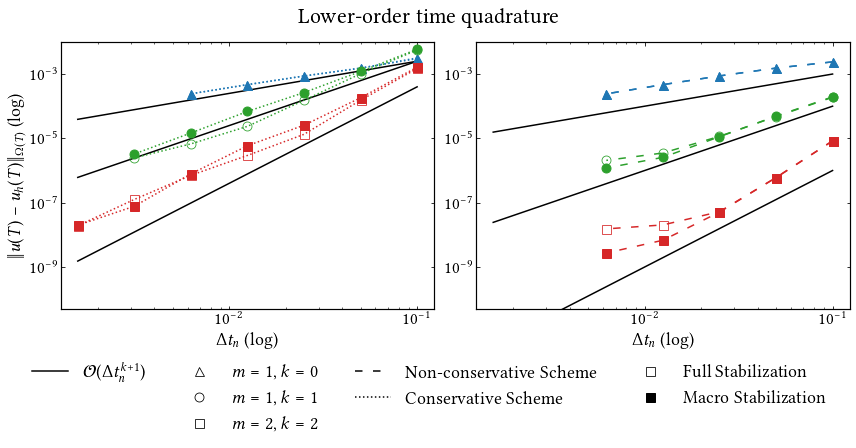

In [7]:

""" L2 vs dt """
### with normal quadrature order

# h = 0.005, nx = ny = 201

# P0P1, n = 3
error_conservative_P0P1_macro = [0.003176861088117188, 0.001527496688651269, 0.0008687325649048555, 0.0004671653112662256, 0.0002422253627057125]
error_conservative_P0P1_fullstab = [0.003009634945274748, 0.001523543527794882, 0.0008699186260096819, 0.0004677703083672906, 0.0002425343887784299]

error_classical_P0P1_macro = [0.002391152413778875, 0.00153045699868446, 0.00087287387519328, 0.0004674646800051914, 0.0002423016619667762]
error_classical_P0P1_fullstab = [0.002389220003542316, 0.001530596926512915, 0.0008732505096759034, 0.0004677907267248872, 0.0002425199307744222]

# P1 P1, n = 3
error_classical_P1P1_macro = [0.0001948862885002824, 4.909174317812143e-05, 1.123721880102907e-05, 2.563108384951002e-06, 1.19884408538203e-06]
error_classical_P1P1_fullstab = [0.0001894372912046837, 4.763599126119256e-05, 1.155028200839513e-05, 3.505661568151647e-06, 2.068842994145333e-06]
cond_classical_P1P1_fullstab = [4.729573e+05,1.344393e+05,5.525427e+04,2.658759e+04,1.372433e+04]

error_conservative_P1P1_macro = [0.00588741263673301, 0.001202737636059589, 0.0002655557565116284, 6.868483426363614e-05, 1.469821654382444e-05, 3.275903959046383e-06]
cond_conservative_P1P1_macro = [1.608482e+06,5.570517e+05,2.319938e+05,1.186097e+05,5.379258e+04]
error_conservative_P1P1_fullstab = [0.005581422156695842, 0.001020433012071045, 0.0001527009095028262, 2.361617900684426e-05, 6.733661582539843e-06, 2.485044966158776e-06]
cond_conservative_P1P1_fullstab = [9.370592e+05,2.198378e+05,7.089865e+04,2.967157e+04,1.439205e+04]


# P2 P2
error_classical_P2P2_macro = [8.332566469846232e-06, 6.041741940940425e-07, 5.077054853520712e-08, 6.788255783738647e-09, 2.722429456330098e-09]
cond_classical_P2P2_macro = [4.965193e+10,1.821922e+10,9.906596e+09,8.943915e+09,3.388502e+09]

error_classical_P2P2_fullstab = [8.354027190762261e-06, 5.999276265518835e-07, 5.243869399413936e-08, 2.033277540945095e-08, 1.53068328858331e-08]

# n = 5
error_conservative_P2P2_macro = [0.001639019702577382, 0.0001823522938820828, 2.566360207164428e-05, 5.894405545087339e-06, 7.86182323330281e-07, 7.726404235498557e-08, 1.985433878530719e-08]#[0.001639019702577382, 0.0001823522938820828, 2.566360207164428e-05, 5.894405545087339e-06, 7.86182323330281e-07, 2.638313685419579e-07]
cond_conservative_P2P2_macro = [8.969031e+10,2.916841e+10,1.346534e+10,1.049788e+10,3.348970e+09]

error_conservative_P2P2_fullstab = [0.001486631966733258, 0.0001536160239168151, 1.334660187226042e-05, 2.943325006000014e-06, 7.08617148743233e-07, 1.260643485015267e-07, 1.91389468970133e-08]#[0.001486631966733258, 0.0001536160239168151, 1.334660187226042e-05, 2.943325006000014e-06, 7.08617148743233e-07, 3.214239191639807e-07]


dt = [0.1, 0.05, 0.025, 0.0125, 0.00625, 0.003125, 0.0015625]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.loglog(dt, 0.25e-1*np.power(dt, 1), linestyle="-", color="black")  
ax1.loglog(dt, 0.25e-0*np.power(dt, 2), linestyle="-", color="black")  
ax1.loglog(dt, .4e-0*np.power(dt, 3), linestyle="-", color="black") 
#ax1.loglog(dt, 1.e-2*np.power(dt, 4), linestyle="-", color="black")  

ax1.loglog(dt[:-2], error_conservative_P0P1_macro, marker='^', markersize=9, linestyle=":", color="C0")
ax1.loglog(dt[:-2], error_conservative_P0P1_fullstab, marker='^', markersize=9, linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0")
ax1.loglog(dt[:-1], error_conservative_P1P1_fullstab, marker='o', markersize=9, linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2")
ax1.loglog(dt[:-1], error_conservative_P1P1_macro, marker='o', markersize=9, linestyle=":", color="C2")
ax1.loglog(dt, error_conservative_P2P2_fullstab, marker='s', markersize=9, linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3")
ax1.loglog(dt, error_conservative_P2P2_macro, marker='s', markersize=9, linestyle=":", color="C3")

ax1.set_ylim(0.5e-10, 1e-2)
ax1.set_xlabel(r"$\Delta t_n$ (log)", fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=17)
ax1.set_ylabel(r"$\|u(T)-u_h(T)\|_{\Omega(T)}$ (log)", fontsize=18)


ax2.loglog(dt, 0.1e-1*np.power(dt, 1), linestyle="-", color="black")  
ax2.loglog(dt, 1e-2*np.power(dt, 2), linestyle="-", color="black")  
ax2.loglog(dt, 1.e-3*np.power(dt, 3), linestyle="-", color="black") 

#ax2.loglog([],[], label=r"$\mathcal{O}(h^{k+1})$", linestyle="-", color="black")

ax2.loglog(dt[:-2], error_classical_P0P1_fullstab, marker='^', markersize=9, linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C0")
ax2.loglog(dt[:-2], error_classical_P0P1_macro, marker='^', markersize=9, linestyle=(0, (5,7)), color="C0")
ax2.loglog(dt[:-2], error_classical_P1P1_fullstab, marker='o', markersize=9, linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C2")
ax2.loglog(dt[:-2], error_classical_P1P1_macro, marker='o', markersize=9, linestyle=(0, (5,7)), color="C2")
ax2.loglog(dt[:-2], error_classical_P2P2_fullstab, marker='s', markersize=9, linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C3")
ax2.loglog(dt[:-2], error_classical_P2P2_macro, marker='s', markersize=9, linestyle=(0, (5,7)), color="C3")

#ax1.loglog(dt[:-2], error_classical_P3P3_fullstab, marker='s', markersize=9, linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C4")

ax2.loglog([],[], label=r"$\mathcal{O}(\Delta t_n^{k+1})$", linestyle="-", color="black")
ax2.loglog([], [], label=" ", linestyle="None")
ax2.loglog([],[], linestyle="None", label=" ")
ax2.loglog([],[], linestyle="None",  marker='^', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"$m=1, k=0$")
ax2.loglog([],[], linestyle="None",  marker='o', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"$m=1, k=1$")
ax2.loglog([],[], linestyle="None",  marker='s', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"$m=2, k=2$")
#ax2.loglog([],[], linestyle="None", label=" ")
ax2.loglog([],[], linestyle=(0, (5,7)), color="black",label=r"Non-conservative Scheme")
ax2.loglog([],[], linestyle=":", color="black", label=r"Conservative Scheme")
#ax2.loglog([],[], linestyle="None", label=" ")
ax2.loglog([],[], linestyle="None",  marker='s', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"Full Stabilization")
ax2.loglog([],[], linestyle="None",  marker='s', markersize=9, color="black", label=r"Macro Stabilization")

ax2.set_ylim(0.5e-10, 1e-2)
ax2.set_xlabel(r"$\Delta t_n$ (log)", fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=17)
# ax2.set_ylabel(r"Condition Number (log)", fontsize=18)
#fig.suptitle(r"$L^2$-error vs $\Delta t_n$, $h=0.005$", fontsize=22)
fig.suptitle(r"Lower-order time quadrature", fontsize=22)
handles, labels = [(a + b) for a, b in zip(ax1.get_legend_handles_labels(), ax2.get_legend_handles_labels())]
fig.legend(handles, labels, loc='lower center', ncols=4, bbox_to_anchor=(0.5, -0.25), fontsize=18, frameon=False)
plt.tight_layout()
plt.show()



### With higher quadrature order

# P0P1

# h = 0.005, tau_1 = 0.1, n = 4
# error_conservative_P0P1_macro = 
# error_conservative_P0P1_fullstab =

# error_classical_P0P1_macro = 
# error_classical_P0P1_fullstab = 

# P1 P1

# h = 0.005, nx = ny = 201, n = 5
# error_classical_P1P1_macro = 
# error_classical_P1P1_fullstab =

# error_conservative_P1P1_macro =
# error_conservative_P1P1_fullstab =


# h = 0.005, n = 7

# P2 P2
#error_classical_P2P2_macro = 
#error_classical_P2P2_fullstab = 

# error_conservative_P2P2_macro = 
# error_conservative_P2P2_fullstab =

# dt = [0.1, 0.05, 0.025, 0.0125, 0.00625, 0.003125, 0.0015625]   #[0.1, 0.05, 0.025, 0.0125, 0.00625, 0.00454]


# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# ax1.loglog(dt, 0.25e-1*np.power(dt, 1), linestyle="-", color="black")  
# ax1.loglog(dt, 0.25e-0*np.power(dt, 2), linestyle="-", color="black")  
# ax1.loglog(dt, .4e-0*np.power(dt, 3), linestyle="-", color="black") 
# ax1.loglog(dt, error_conservative_P2P2_fullstab, marker='s', markersize=9, linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3")
# ax1.loglog(dt, error_conservative_P2P2_macro, marker='s', markersize=9, linestyle=":", color="C3")
# ax1.set_ylim(0.5e-10, 1e-2)
# ax1.set_xlabel(r"$\Delta t_n$ (log)", fontsize=18)
# ax1.tick_params(axis='both', which='major', labelsize=17)
# ax1.set_ylabel(r"$\|u(T)-u_h(T)\|_{\Omega(T)}$ (log)", fontsize=18)


# ax2.loglog(dt, 0.1e-1*np.power(dt, 1), linestyle="-", color="black")  
# ax2.loglog(dt, 1e-2*np.power(dt, 2), linestyle="-", color="black")  
# ax2.loglog(dt, 1.e-3*np.power(dt, 3), linestyle="-", color="black") 
# ax2.loglog([],[], label=r"$\mathcal{O}(\Delta t_n^{k+1})$", linestyle="-", color="black")
# ax2.loglog([], [], label=" ", linestyle="None")
# ax2.loglog([],[], linestyle="None", label=" ")
# ax2.loglog([],[], linestyle="None",  marker='^', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"$m=1, k=0$")
# ax2.loglog([],[], linestyle="None",  marker='o', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"$m=1, k=1$")
# ax2.loglog([],[], linestyle="None",  marker='s', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"$m=2, k=2$")
# ax2.loglog([],[], linestyle=(0, (5,7)), color="black",label=r"Non-conservative Scheme")
# ax2.loglog([],[], linestyle=":", color="black", label=r"Conservative Scheme")
# ax2.loglog([],[], linestyle="None",  marker='s', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"Full Stabilization")
# ax2.loglog([],[], linestyle="None",  marker='s', markersize=9, color="black", label=r"Macro Stabilization")
# ax2.set_ylim(0.5e-10, 1e-2)
# ax2.set_xlabel(r"$\Delta t_n$ (log)", fontsize=18)
# ax2.tick_params(axis='both', which='major', labelsize=17)
# # ax2.set_ylabel(r"Condition Number (log)", fontsize=18)
# fig.suptitle(r"Higher-order time quadrature", fontsize=22)
# handles, labels = [(a + b) for a, b in zip(ax1.get_legend_handles_labels(), ax2.get_legend_handles_labels())]
# fig.legend(handles, labels, loc='lower center', ncols=4, bbox_to_anchor=(0.5, -0.25), fontsize=18, frameon=False)
# plt.tight_layout()
# plt.show()

### 6. Conservation error for conservative (left) and non-conservative (right) schemes in last time point vs $h$.

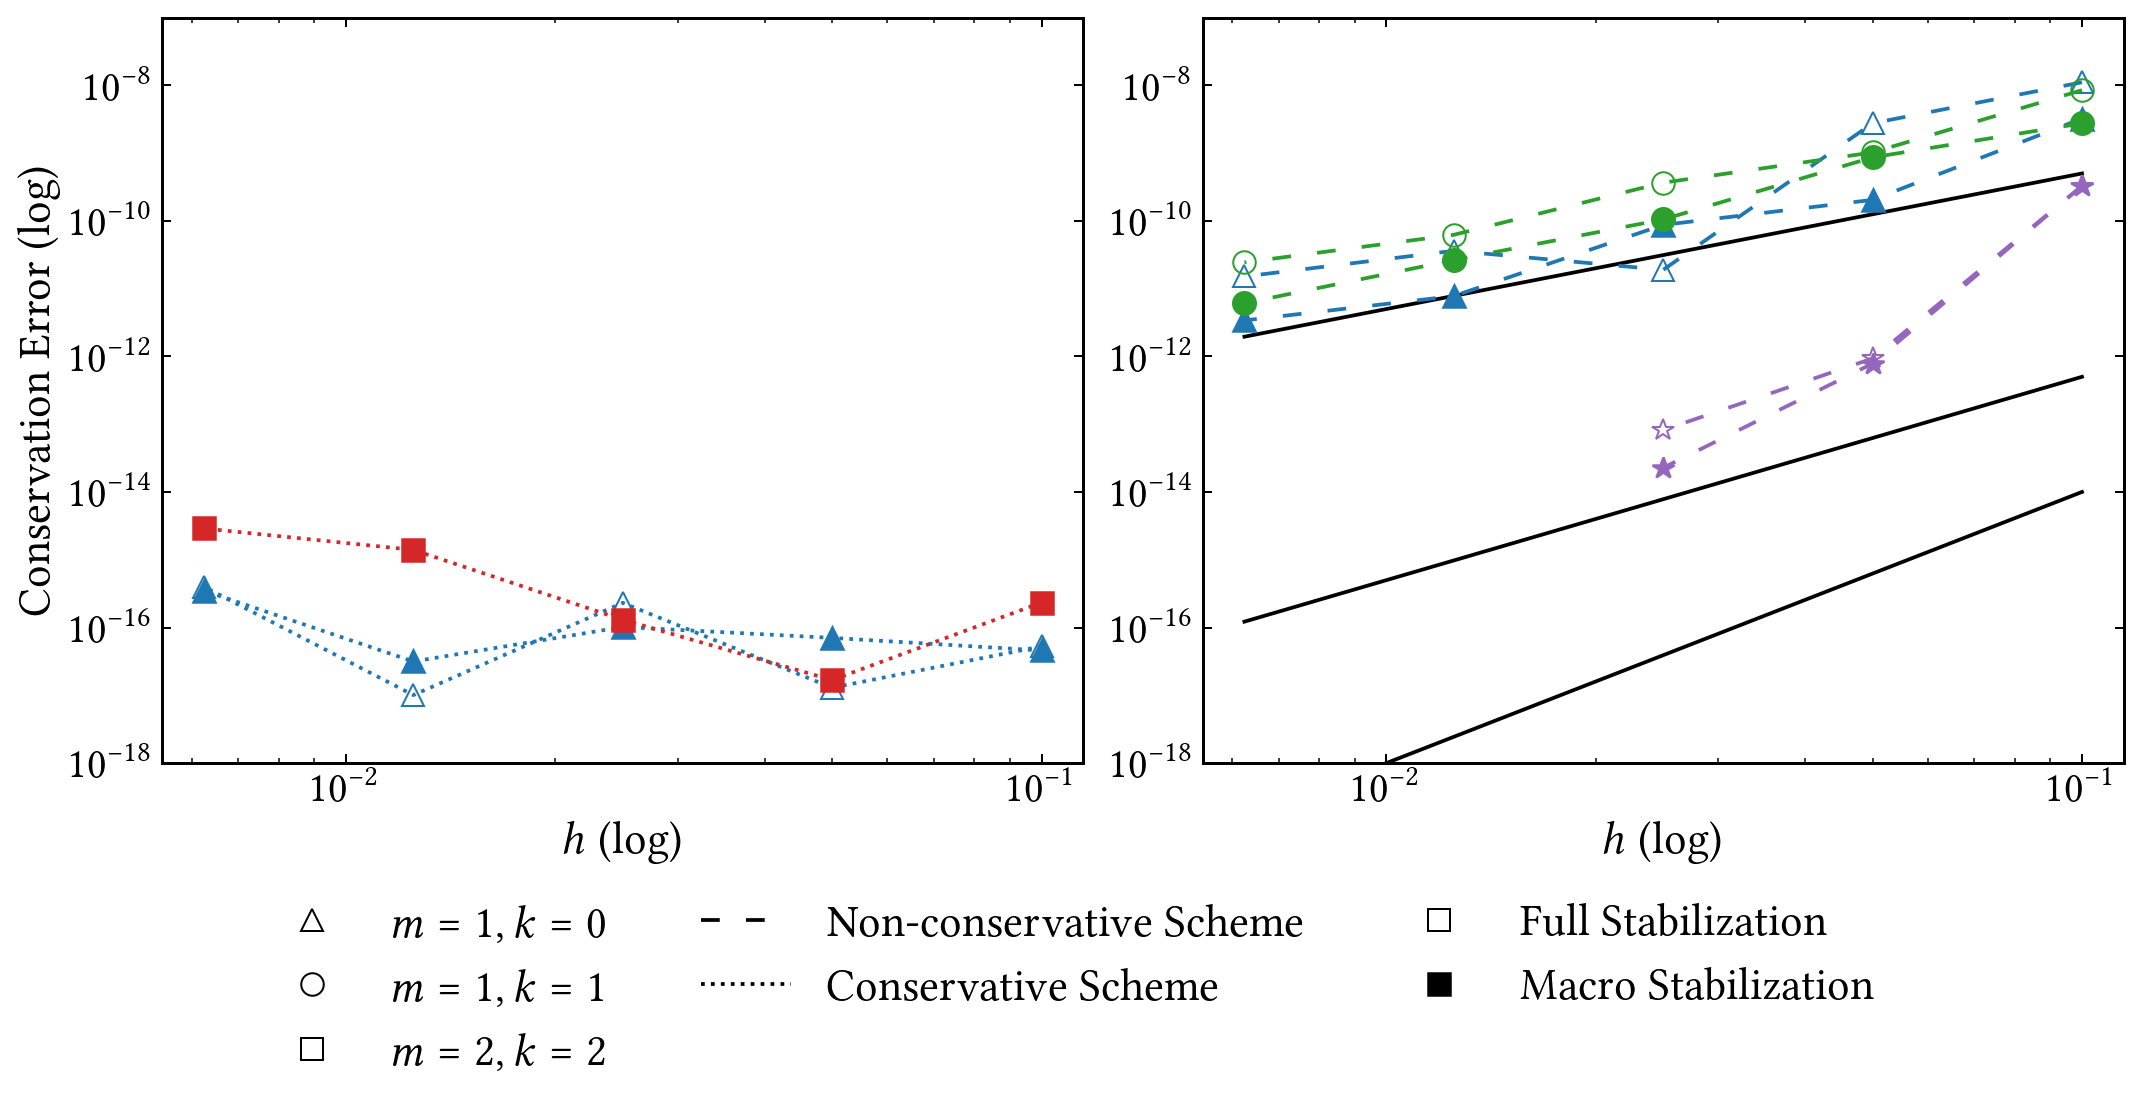

In [9]:

error_conservative_P0P1_fullstab = [5.280403393183308e-17, 1.293419310457317e-17, 2.311948900959827e-16, 1.00754039680307e-17, 3.985281811199807e-16]
error_conservative_P0P1_macro = [4.586514002792585e-17, 7.033253374231357e-17, 1.018720172915643e-16, 3.155795945541267e-17, 3.499559237926301e-16]
# error_conservative_P1P1_fullstab = 
# error_conservative_P1P1_macro = 
# error_conservative_P2P2_fullstab = 
error_conservative_P2P2_macro = [2.335778055348459e-16, 1.678649894868572e-17, 1.301546591586222e-16, 1.39702853938414e-15, 2.893564378594458e-15]  
                                
error_classical_P0P1_fullstab = [1.107459959577467e-08, 2.752354836155308e-09, 1.8931990133191e-11, 3.616512331259579e-11, 1.510295059872924e-11]
error_classical_P0P1_macro = [3.225771923119186e-09, 2.039422163370002e-10, 8.710088678993236e-11, 7.776726845950667e-12, 3.395842176649564e-12]
error_classical_P1P1_fullstab = [8.468055628998045e-09, 1.021918097810032e-09, 3.654692889896662e-10, 6.220686152289866e-11, 2.435528560798695e-11]
error_classical_P1P1_macro =  [2.742173554961142e-09, 8.63479365342717e-10, 1.048726405626301e-10, 2.637566934291834e-11, 6.085802459450565e-12]
# error_classical_P2P2_fullstab = 
# error_classical_P2P2_macro = 

error_classical_P3P3_fullstab = [3.26627673950179e-10, 9.331245442268732e-13, 8.188063239112091e-14]    # h = 0.1, 0.05, 0.025
error_classical_P3P3_macro = [3.272531874800406e-10, 7.855481486785743e-13, 2.27404396481196e-14]

# Conservation vs h
h = [0.1, 0.05, 0.025, 0.0125, 0.00625]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.loglog(h, error_conservative_P0P1_fullstab, marker='^', markersize=9, linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0")
ax1.loglog(h, error_conservative_P0P1_macro, marker='^', markersize=9, linestyle=":", color="C0")
#ax1.loglog(h, error_conservative_P1P1_fullstab, marker='o', markersize=9, linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2")
#ax1.loglog(h, error_conservative_P1P1_macro, marker='o', markersize=9, linestyle=":", color="C2")
#ax1.loglog(h, error_conservative_P2P2_fullstab, marker='s', markersize=9, linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3")
ax1.loglog(h, error_conservative_P2P2_macro, marker='s', markersize=9, linestyle=":", color="C3")


ax1.set_xlabel(r"$h$ (log)", fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=17)
ax1.set_ylabel(r"Conservation Error (log)", fontsize=18)
ax1.set_ylim(1e-18, 1e-7)

ax2.loglog(h, 0.5e-7*np.power(h, 2), linestyle="-", color="black")  
ax2.loglog(h, 0.5e-9*np.power(h, 3), linestyle="-", color="black")  
ax2.loglog(h, 1.e-10*np.power(h, 4), linestyle="-", color="black")  
ax2.loglog(h, error_classical_P0P1_fullstab, marker='^', markersize=9, linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C0")
ax2.loglog(h, error_classical_P0P1_macro, marker='^', markersize=9, linestyle=(0, (5,7)), color="C0")
ax2.loglog(h, error_classical_P1P1_fullstab, marker='o', markersize=9, linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C2")
ax2.loglog(h, error_classical_P1P1_macro, marker='o', markersize=9, linestyle=(0, (5,7)), color="C2")
#ax2.loglog(h, error_classical_P2P2_fullstab, marker='s', markersize=9, linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C3")
#ax2.loglog(h, error_classical_P2P2_macro, marker='s', markersize=9, linestyle=(0, (5,7)), color="C3")

ax2.loglog(h[:-2], error_classical_P3P3_fullstab, marker='*', markersize=9, linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C4")
ax2.loglog(h[:-2], error_classical_P3P3_macro, marker='*', markersize=9, linestyle=(0, (5,7)), color="C4")



# ax2.loglog([],[], label=r"$\mathcal{O}(h^{k+1})$", linestyle="-", color="black")
# ax2.loglog(h, 3e7*np.power(h, -2), label=r"$\mathcal{O}(h^{-2})$", linestyle="-.", color="black")
#ax2.loglog([],[], linestyle="None", label=" ")
ax2.loglog([],[], linestyle="None",  marker='^', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"$m=1, k=0$")
ax2.loglog([],[], linestyle="None",  marker='o', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"$m=1, k=1$")
ax2.loglog([],[], linestyle="None",  marker='s', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"$m=2, k=2$")
#ax2.loglog([],[], linestyle="None", label=" ")
ax2.loglog([],[], linestyle=(0, (5,7)), color="black",label=r"Non-conservative Scheme")
ax2.loglog([],[], linestyle=":", color="black", label=r"Conservative Scheme")
ax2.loglog([],[], linestyle="None", label=" ")
ax2.loglog([],[], linestyle="None",  marker='s', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"Full Stabilization")
ax2.loglog([],[], linestyle="None",  marker='s', markersize=9, color="black", label=r"Macro Stabilization")

# ax2.loglog(h, cond_conservative_P0P1_fullstab, marker='^', markersize=9, linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0")
# ax2.loglog(h, cond_conservative_P0P1_macro, marker='^', markersize=9, linestyle=":", color="C0")
# ax2.loglog(h, cond_conservative_P1P1_fullstab, marker='o', markersize=9, linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2")
# ax2.loglog(h, cond_conservative_P1P1_macro, marker='o', markersize=9, linestyle=":", color="C2")
# ax2.loglog(h, cond_conservative_P2P2_fullstab, marker='s', markersize=9, linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3")
# ax2.loglog(h, cond_conservative_P2P2_macro, marker='s', markersize=9, linestyle=":", color="C3")

# ax2.loglog(h, cond_classical_P0P1_fullstab, marker='^', markersize=9, linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C0")
# ax2.loglog(h, cond_classical_P0P1_macro, marker='^', markersize=9, linestyle=(0, (5,7)), color="C0")
# ax2.loglog(h, cond_classical_P1P1_fullstab, marker='o', markersize=9, linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C2")
# ax2.loglog(h, cond_classical_P1P1_macro, marker='o', markersize=9, linestyle=(0, (5,7)), color="C2")
# ax2.loglog(h, cond_classical_P2P2_fullstab, marker='s', markersize=9, linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C3")
# ax2.loglog(h, cond_classical_P2P2_macro, marker='s', markersize=9, linestyle=(0, (5,7)), color="C3")

ax2.set_xlabel(r"$h$ (log)", fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=17)
ax2.set_ylim(1e-18, 1e-7)
#ax2.set_ylabel(r"Condition Number (log)", fontsize=18)
handles, labels = [(a + b) for a, b in zip(ax1.get_legend_handles_labels(), ax2.get_legend_handles_labels())]
fig.legend(handles, labels, loc='lower center', ncols=3, bbox_to_anchor=(0.5, -0.25), fontsize=18, frameon=False)
plt.tight_layout()
plt.show()
